# BANJIR: MODEL KLASIFIKASI (A2)


---

In [1]:
# import libraries
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
# from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_absolute_error, mean_squared_error

import os
import sys
import warnings

In [2]:
# functions

In [3]:
# setting
# display max columns
pd.set_option('display.max_columns', None)

In [4]:
# system info
print('python/system version:', sys.version)
print('tf version:', tf.__version__)
print('gpu num:', len(tf.config.experimental.list_physical_devices('GPU')))
print('cuda:', tf.test.is_built_with_cuda())

python/system version: 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
tf version: 2.10.0
gpu num: 1
cuda: True


## - DATA UNDERSTANDING

In [5]:
 # read dataset modeling
df = pd.read_csv('dataset/dataset_saved-A/dataset_A2/flood-A2_modeling.csv')

# read dataset lengkap (untuk meihat kejadian-kejadian banjir yang tercatat/diberitakan di media)
df_all = pd.read_csv('dataset/dataset_saved-A/dataset_A2/flood-A2_all.csv')

### Data Exploration

Kejadian banjir:
- 11-06-2022 20:58 = [pusatkrisis.kemkes.go.id](https://pusatkrisis.kemkes.go.id/Banjir-di-KOTA-PADANG-SUMATERA-BARAT-11-06-2022-94)
- 02-10-2022 03:00 = [pusatkrisis.kemkes.go.id](https://pusatkrisis.kemkes.go.id/Banjir-di-KOTA-PADANG-SUMATERA-BARAT-02-10-2022-77)
- 11-11-2022 18:30 = [liputan6.com](https://www.liputan6.com/regional/read/5123074/hujan-sejak-siang-kota-padang-dilanda-banjir)

In [6]:
# menyesuaikan format date
df_all['date'] = df_all['date'] + ':00'
df_all['date'] = pd.to_datetime(df_all['date'], format='%d/%m/%Y %H:%M:%S')

df_all = df_all.set_index('date')

# menampilkan dataset lengkap
df_all.head(3) 

,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
date,,,,,,,,,,,,,,
2022-06-03 00:00:00,23.52,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
2022-06-03 00:10:00,24.45,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
2022-06-03 00:20:00,25.37,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10


#### Kejadian banjir 1

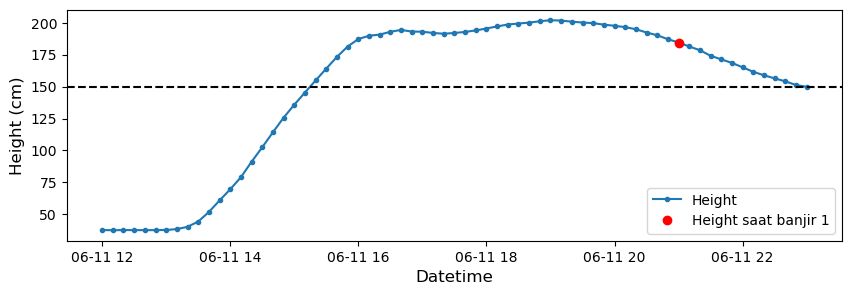

,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
date,,,,,,,,,,,,,,
2022-06-11 20:50:00,187.09,19.8,19.8,19.9,100.0,0.0,0,13.3,4.7,278.0,1012,100.0,0.1,10


In [7]:
# grafik banjir 1
plt.figure(figsize=(10, 3))
plt.plot(df_all['height']['2022-06-11 12:00:00':'2022-06-11 23:00:00'], '.-')
plt.plot(df_all['height']['2022-06-11 21:00:00':'2022-06-11 21:00:00'], 'ro')
plt.xlabel('Datetime', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.legend(['Height', 'Height saat banjir 1'],loc='lower right')
plt.axhline(y=150, color='black', linestyle='--')
plt.show()

# data
df_all['2022-06-11 20:50:00':'2022-06-11 20:50:00']

#### Kejadian banjir 2

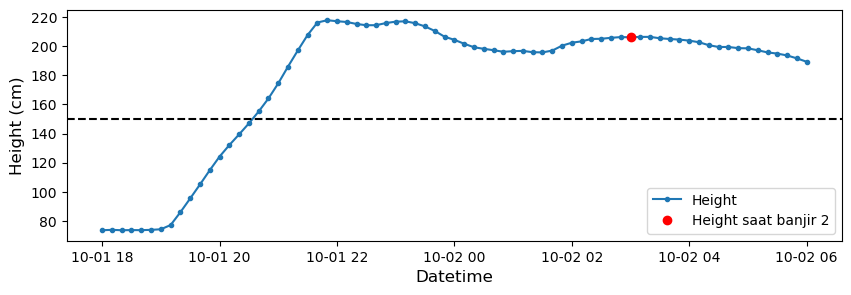

,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
date,,,,,,,,,,,,,,
2022-10-02 03:00:00,206.01,19.9,19.9,19.5,97.55,0.6,100,1.1,1.1,138.2,1010,47.7,17.3,10


In [8]:
# grafik banjir 2
plt.figure(figsize=(10, 3))
plt.plot(df_all['height']['2022-10-01 18:00:00':'2022-10-02 06:00:00'], '.-')
plt.plot(df_all['height']['2022-10-02 03:00:00':'2022-10-02 03:00:00'], 'ro')
plt.xlabel('Datetime', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.legend(['Height', 'Height saat banjir 2'],loc='lower right')
plt.axhline(y=150, color='black', linestyle='--')
plt.show()

# data
df_all['2022-10-02 03:00:00':'2022-10-02 03:00:00']

#### Kejadian banjir 3

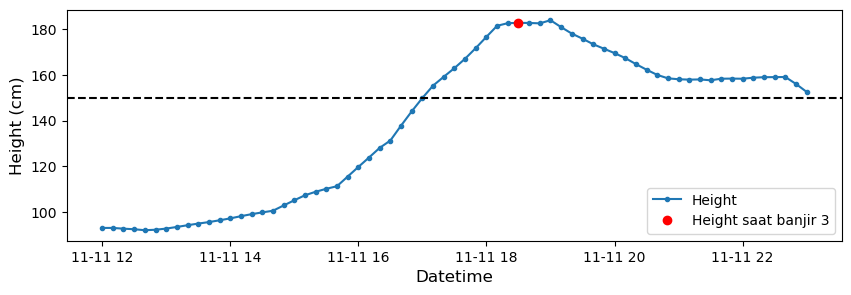

,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
date,,,,,,,,,,,,,,
2022-11-11 18:30:00,182.85,20.7,20.7,20.4,98.17,0.5,100,4.7,2.5,205.3,1011,91.7,3.7,10


In [9]:
# grafik banjir 2
plt.figure(figsize=(10, 3))
plt.plot(df_all['height']['2022-11-11 12:00:00':'2022-11-11 23:00:00'], '.-')
plt.plot(df_all['height']['2022-11-11 18:30:00':'2022-11-11 18:30:00'], 'ro')
plt.xlabel('Datetime', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.legend(['Height', 'Height saat banjir 3'],loc='lower right')
plt.axhline(y=150, color='black', linestyle='--')
plt.show()

# data
df_all['2022-11-11 18:30:00':'2022-11-11 18:30:00']

### Defining Label

Dari ketiga kejadian banjir, banjir terjadi saat tinggi air > 150 cm. Jadi, label akan dibagi menjadi 3 tingkatan:
- siaga 0 (aman), tinggi air <= 100 cm
- siaga 1 (waspada), 100 cm < tinggi air <= 150 cm
- siaga 2 (bahaya), tinggi air > 150 cm

In [10]:
# define aman=0, siaga 1=1, siaga 2=2
df['status'] = np.where(df['height'] <= 100, 0, 
                        np.where(df['height'] <= 150, 1, 
                                 2))

In [14]:
df[['date','height','status']].sample(5)

,date,height,status
10290,13/08/2022 11:00,38.91,0
9270,06/08/2022 09:00,34.14,0
13230,02/09/2022 21:00,182.73,2
1343,12/06/2022 07:50,98.95,0
6367,17/07/2022 05:10,28.39,0


In [15]:
df['status'].value_counts()

0    13427
1      433
2      140
Name: status, dtype: int64

## - DATA PREPROCESSING

In [16]:
# Membagi fitur/prediktor dan label
X = df[['height']]
y = df[['status']]

# Split dataset menjadi train, val, dan test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# scaling/normalisasi data
'''
  fit hanya pada data train 
  agar tidak terjadi data leakage/kebocoran data
'''
scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10080, 1), (10080, 1), (2800, 1), (2800, 1), (1120, 1), (1120, 1))

In [17]:
# save scaler
import joblib

joblib.dump(scaler_X, 'scaler/scaler_A2/scaler_X_klasifikasi_flood-A2.save') 

['scaler/scaler_A2/scaler_X_klasifikasi_flood-A2.save']

## - MODELING & RESULT

### Model GRU

In [18]:
# Membuat model GRU
model_klasifikasi = Sequential()
model_klasifikasi.add(GRU(32, input_shape=(None, 1)))
model_klasifikasi.add(Dense(3, activation='softmax'))
model_klasifikasi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 3,459
Trainable params: 3,459
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_klasifikasi.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

history_klasifikasi = model_klasifikasi.fit(X_train, y_train, 
                                            validation_data=(X_val, y_val),
                                            epochs=20, batch_size=32)

Epoch 1/20
315/315 [==============================] - 7s 13ms/step - loss: 0.4118 - accuracy: 0.9586 - val_loss: 0.1981 - val_accuracy: 0.9600
Epoch 2/20
315/315 [==============================] - 3s 11ms/step - loss: 0.1684 - accuracy: 0.9586 - val_loss: 0.1316 - val_accuracy: 0.9600
Epoch 3/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1070 - accuracy: 0.9588 - val_loss: 0.0834 - val_accuracy: 0.9614
Epoch 4/20
315/315 [==============================] - 3s 10ms/step - loss: 0.0716 - accuracy: 0.9655 - val_loss: 0.0615 - val_accuracy: 0.9675
Epoch 5/20
315/315 [==============================] - 4s 11ms/step - loss: 0.0542 - accuracy: 0.9742 - val_loss: 0.0484 - val_accuracy: 0.9739
Epoch 6/20
315/315 [==============================] - 3s 11ms/step - loss: 0.0438 - accuracy: 0.9818 - val_loss: 0.0398 - val_accuracy: 0.9825
Epoch 7/20
315/315 [==============================] - 3s 9ms/step - loss: 0.0363 - accuracy: 0.9866 - val_loss: 0.0331 - val_accuracy: 0.9911


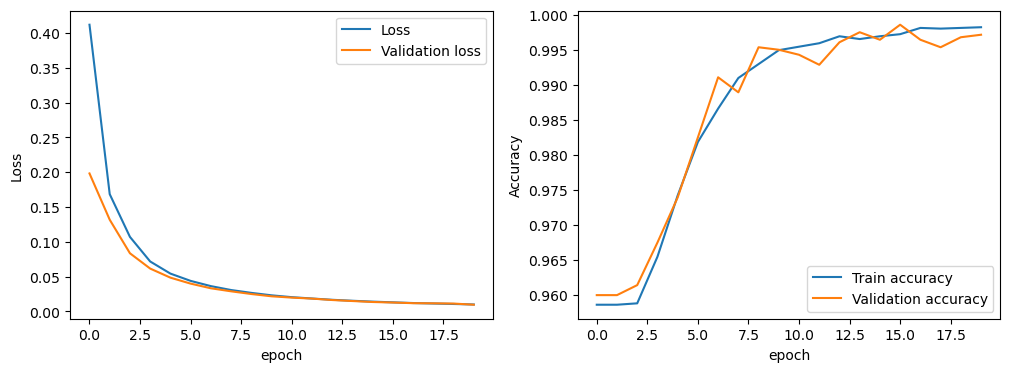

In [20]:
# plot loss & accuracy
plt.figure(figsize=(12, 4))
    
plt.subplot(121) # row , col , index 
plt.plot(history_klasifikasi.history['loss'])
plt.plot(history_klasifikasi.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation loss'], loc='upper right')

plt.subplot(122) 
plt.plot(history_klasifikasi.history['accuracy'])
plt.plot(history_klasifikasi.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='lower right')
    
plt.show()

In [21]:
# Evaluasi model
train_scores = model_klasifikasi.evaluate(X_train, y_train, verbose=0)
val_scores = model_klasifikasi.evaluate(X_val, y_val, verbose=0)
test_scores = model_klasifikasi.evaluate(X_test, y_test, verbose=0)

# dataframe untuk evaluasi model
df_eval = pd.DataFrame(index=['train', 'val', 'test'],
                       columns=['loss', 'accuracy'])

df_eval.loc['train', 'loss']=train_scores[0]
df_eval.loc['train', 'accuracy']=train_scores[1]

df_eval.loc['val', 'loss']=val_scores[0]
df_eval.loc['val', 'accuracy']=val_scores[1]

df_eval.loc['test', 'loss']=test_scores[0]
df_eval.loc['test', 'accuracy']=test_scores[1]

df_eval

,loss,accuracy
train,0.00944,0.998413
val,0.009512,0.997143
test,0.008699,0.999107


### Result

#### Satu data

In [22]:
#sample_test = X_test.reshape(-1)
sample_test = pd.DataFrame(X_test, columns = ['height_scaled'])
sample_test = sample_test.sample(1).reset_index(drop=True)

# inverse transform
sample_test_inverse = scaler_X.inverse_transform(sample_test[['height_scaled']])
sample_test_inverse = pd.DataFrame(sample_test_inverse,columns = ['height'])

sample_test=sample_test.join(sample_test_inverse)
sample_test

,height_scaled,height
0,0.063227,33.5


In [23]:
pred = model_klasifikasi.predict(sample_test[['height_scaled']])
pred = np.argmax(pred, axis=1)
pred

1/1 [==============================] - 0s 375ms/step


array([0], dtype=int64)

In [24]:
pred = pd.DataFrame(pred,columns = ['status_pred'])
prediksi = sample_test.join(pred)

prediksi

,height_scaled,height,status_pred
0,0.063227,33.5,0


#### Banyak data

In [25]:
#sample_test = X_test.reshape(-1)
sample_test = pd.DataFrame(X_test, columns = ['height_scaled'])
sample_test = sample_test.sample(6).reset_index(drop=True)

# inverse transform
sample_test_inverse = scaler_X.inverse_transform(sample_test[['height_scaled']])
sample_test_inverse = pd.DataFrame(sample_test_inverse,columns = ['height'])

sample_test=sample_test.join(sample_test_inverse)
sample_test

,height_scaled,height
0,0.189078,56.43
1,0.938419,192.96
2,0.320637,80.40
3,0.045499,30.27
4,0.287377,74.34
5,0.181778,55.10


In [26]:
pred = model_klasifikasi.predict(sample_test[['height_scaled']])
pred = np.argmax(pred, axis=1)
pred

1/1 [==============================] - 0s 49ms/step


array([0, 2, 0, 0, 0, 0], dtype=int64)

In [27]:
pred = pd.DataFrame(pred,columns = ['status_pred'])
prediksi = sample_test.join(pred)

prediksi

,height_scaled,height,status_pred
0,0.189078,56.43,0
1,0.938419,192.96,2
2,0.320637,80.40,0
3,0.045499,30.27,0
4,0.287377,74.34,0
5,0.181778,55.10,0


## - SAVE MODEL

In [28]:
# save model dalam format .h5
model_klasifikasi.save('model/model_A2/model_klasifikasi_flood-A2.h5')

In [29]:
# # Memuat model dari format HDF5
from tensorflow.keras.models import load_model
loaded_model = load_model('model/model_A2/model_klasifikasi_flood-A2.h5')

In [30]:
# Evaluasi model
train_scores = loaded_model.evaluate(X_train, y_train, verbose=0)
val_scores = loaded_model.evaluate(X_val, y_val, verbose=0)
test_scores = loaded_model.evaluate(X_test, y_test, verbose=0)

# dataframe untuk evaluasi model
df_eval = pd.DataFrame(index=['train', 'val', 'test'],
                       columns=['loss', 'accuracy'])

df_eval.loc['train', 'loss']=train_scores[0]
df_eval.loc['train', 'accuracy']=train_scores[1]

df_eval.loc['val', 'loss']=val_scores[0]
df_eval.loc['val', 'accuracy']=val_scores[1]

df_eval.loc['test', 'loss']=test_scores[0]
df_eval.loc['test', 'accuracy']=test_scores[1]

df_eval

,loss,accuracy
train,0.00944,0.998413
val,0.009512,0.997143
test,0.008699,0.999107


---